<a href="https://colab.research.google.com/github/Tensor-Reloaded/Advanced-Topics-in-Neural-Networks-Template-2023/blob/main/Lab1/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

* A discriminative model that computes the conditional probability of class `y` given the input `x`: $P(y | x)$.

## Binary Logistic Regression

$x_i$ - a feature representation of the input $[x_1, x_2, \dots, x_n]$.

$w$ - a vector of weights used by Logistic Regression. Each weight is a real number associated with one of the input features $x_i$.

$b$ - a bias term used by Logistic Regression.



### Logistic Regression decision

$z = w \cdot x + b$

$y = \sigma(z) = \frac{1}{1 + exp(-z)}$

$P(y = 1) = \sigma(w \cdot x + b)$

$P(y = 0) = \sigma(-(w \cdot x + b))$

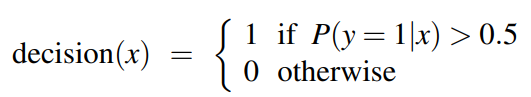
***

Exercise: prove $P(y = 0) = \sigma(-(w \cdot x + b))$.

### Logistic Regression training and update rule

$L_{CE} (y\_pred, y\_true) = -[ y\_true \cdot \log ( y\_pred ) + (1 - y\_true) \log (1 - y\_pred)]$

$\Delta_w = \frac{\delta L_{CE}  (y\_pred, y\_true)}{\delta w}$

$\Delta_b = \frac{\delta L_{CE}  (y\_pred, y\_true)}{\delta b}$

$w' = w - \eta \cdot \Delta_w$

$b' = b = \eta \cdot \Delta_b$

### Example

Input:
x = [1, 3, 0]

Real label:
y_true = 1


Weights:
w = [-0.6, -0.5, 2]

Bias:
b = 0.1

Learning rate:
$\eta = 0.2$

***

$L_{CE} (y\_pred, y\_true) = -[ y\_true \cdot \log ( y\_pred ) + (1 - y\_true) \log (1 - y\_pred)]$

$y\_pred = \sigma(w \cdot x + b) = \sigma(-0.6 \cdot 1 -0.5 \cdot 3 + 2 \cdot 0) = \sigma( -2) = 0.12$

<!-- $L_{CE} (y\_pred, y\_true) = - 1 \cdot \log ( \sigma( -2) ) = -2.1269$ -->

1. Prove that
$\Delta_b = y\_pred - y\_true = -0.88$

2. Prove that
$\Delta_w = [y\_pred - y\_true] \cdot x^T = [-0.88, -2.64, 0]$

$w' = w - \eta \cdot \Delta_w = [-0.6, -0.5, 2] + 0.2 \cdot [-0.88, -2.64, 0] = [-0.42, 0.028, 2]$

$b' = b = \eta \cdot \Delta_b = 0.1 + 0.2 \cdot 0.88 = 0.26$


<!-- $\frac{\delta L_{CE}  (y\_pred, y\_true)}{\delta w_j} = [\sigma(w \cdot x + b) - y\_true] \cdot x_j$ -->

In [ ]:
from sklearn.metrics import accuracy_score
from typing import Tuple

In [ ]:
from numpy import ndarray
import numpy as np


accuracies = []


def sigmoid(x: ndarray) -> ndarray:
    """
    :param x: The batched input; ndarray of size [B, N], where B is the batch dimension and N is the number of features.
    """
    return 1 / (1 + np.exp(-x))


def criterion(y_pred: ndarray, y_true: ndarray) -> ndarray:
    """
    :param y_pred: The batched predicted labels; ndarray of size [B].
    :param y_true: The batched true labels; ndarray of size [B].
    """
    part_1 = y_true * np.clip(np.log(y_pred), 1e-12, None)
    part_2 = (1 - y_true) * np.log(np.clip(1 - y_pred, 1e-12, None))  # The clipping is done because log(0) is -inf.
    return -(part_1 + part_2).mean()

def compute_gradients(x: ndarray, y_pred: ndarray, y_true: ndarray) -> Tuple[ndarray, ndarray]:
    """
    :param x: The batched input; ndarray of size [B, N], where B is the batch dimension and N is the number of features.
    :param y_pred: The batched predicted labels; ndarray of size [B].
    :param y_true: The batched true labels; ndarray of size [B].
    """
    differece = y_pred - y_true
    gradient_b = differece.mean()
    gradients_w = (x.T @ differece).mean(dim=1)
    return gradients_w, gradient_b


def train(x: ndarray, w: ndarray, b: float, true_labels: ndarray, learning_rate: float = 0.1):
    """
    The training is applied on a whole batch at once, instead of training on each sample in the dataset separately.
    Mini-batching and batched operations are widely used in machine learning and deep learning to improve the performance of algorithms.

    :param x: The batched input; ndarray of size [B, N], where B is the batch dimension and N is the number of features.
    :param w: The weights; ndarray of size [N], where N is the number of features.
    :param b: The bias.
    :param true_labels: The batched true labels; ndarray of size [B].
    :learning_rate: The learning rate.
    """
    z = w @ x.T + b
    y = sigmoid(z)
    loss = criterion(y, true_labels)
    w_delta, b_delta = compute_gradients(x, y, true_labels)
    w += learning_rate * w_delta
    b += learning_rate * b_delta

    real_class  = y.round().astype(int)
    return accuracy_score(y, true_labels), loss

In [ ]:
from torch import Tensor
import torch


accuracies = []


def sigmoid(x: Tensor) -> Tensor:
    """
    :param x: The batched input; Tensor of size [B, N], where B is the batch dimension and N is the number of features.
    """
    return 1 / (1 + torch.exp(-x))


def criterion(y_pred: Tensor, y_true: Tensor) -> Tensor:
    """
    :param y_pred: The batched predicted labels; Tensor of size [B].
    :param y_true: The batched true labels; Tensor of size [B].
    """
    part_1 = y_true * torch.clip(torch.log(y_pred), 1e-12, None)
    part_2 = (1 - y_true) * torch.log(torch.clip(1 - y_pred, 1e-12, None))  # The clipping is done because log(0) is -inf.
    return -(part_1 + part_2).mean()

def compute_gradients(x: Tensor, y_pred: Tensor, y_true: Tensor) -> Tuple[Tensor, Tensor]:
    """
    :param x: The batched input; Tensor of size [B, N], where B is the batch dimension and N is the number of features.
    :param y_pred: The batched predicted labels; Tensor of size [B].
    :param y_true: The batched true labels; Tensor of size [B].
    """
    differece = y_pred - y_true
    gradient_b = differece.mean()
    gradients_w = (x.T @ differece).mean(axis=1)
    return gradients_w, gradient_b


def train(x: Tensor, w: Tensor, b: float, true_labels: Tensor, learning_rate: float = 0.1):
    """
    The training is applied on a whole batch at once, instead of training on each sample in the dataset separately.
    Mini-batching and batched operations are widely used in machine learning and deep learning to improve the performance of algorithms.

    :param x: The batched input; Tensor of size [B, N], where B is the batch dimension and N is the number of features.
    :param w: The weights; Tensor of size [N], where N is the number of features.
    :param b: The bias.
    :param true_labels: The batched true labels; Tensor of size [B].
    :learning_rate: The learning rate.
    """
    z = w @ x.T + b
    y = sigmoid(z)
    loss = criterion(y, true_labels)
    w_delta, b_delta = compute_gradients(x, y, true_labels)
    w -= learning_rate * w_delta
    b -= learning_rate * b_delta

    real_class  = y.round().int()
    return accuracy_score(y, true_labels), loss